In [22]:
from flask import Flask, render_template, request, redirect, url_for, session, jsonify
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
db = client['airportDB']
users = db['users']
flights = db["flights"]
bookings = db["bookings"]
discount = db["discount"]

In [23]:
query = flights.aggregate([{'$project': 
                            {'_id': 0,
                             'fromLocation': '$flight_details.fromLocation',
                             'toLocation': '$flight_details.toLocation'
                            }}])

from_locations_dict = {}

for res in query:
    key = (res['fromLocation'])
    from_locations_dict[key] = from_locations_dict.get(key, 0) + 1
    
from_locations_dict = dict(sorted(from_locations_dict.items(), key=lambda item: item[1], reverse=True))

from_locations_dict


{'Chicago': 10,
 'London': 9,
 'Paris': 8,
 'Dubai': 7,
 'Tokyo': 7,
 'Amsterdam': 5,
 'Frankfurt': 5,
 'Istanbul': 4,
 'Sydney': 4,
 'New York': 4,
 'Atlanta': 4,
 'Doha': 4,
 'Toronto': 3,
 'Hong Kong': 3,
 'Abu Dhabi': 3,
 'Mumbai': 2,
 'Dallas': 2,
 'Dublin': 2,
 'Rome': 2,
 'Moscow': 2,
 'Melbourne': 1,
 'Miami': 1,
 'Houston': 1,
 'Munich': 1,
 'Los Angeles': 1,
 'Seoul': 1,
 'Johannesburg': 1,
 'Berlin': 1,
 'Zurich': 1,
 'Delhi': 1}

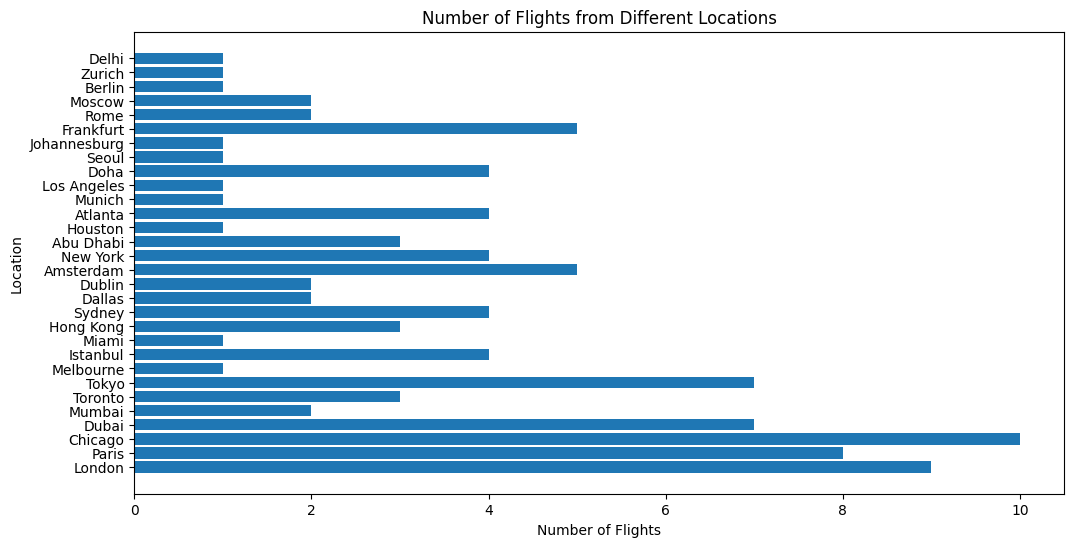

In [24]:
import matplotlib.pyplot as plt

# Input data
from_locations_dict = {'London': 9, 'Paris': 8, 'Chicago': 10, 'Dubai': 7, 'Mumbai': 2, 'Toronto': 3, 'Tokyo': 7, 'Melbourne': 1, 'Istanbul': 4, 'Miami': 1, 'Hong Kong': 3, 'Sydney': 4, 'Dallas': 2, 'Dublin': 2, 'Amsterdam': 5, 'New York': 4, 'Abu Dhabi': 3, 'Houston': 1, 'Atlanta': 4, 'Munich': 1, 'Los Angeles': 1, 'Doha': 4, 'Seoul': 1, 'Johannesburg': 1, 'Frankfurt': 5, 'Rome': 2, 'Moscow': 2, 'Berlin': 1, 'Zurich': 1, 'Delhi': 1}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Create a horizontal bar chart
ax.barh(list(from_locations_dict.keys()), list(from_locations_dict.values()))

# Add title and labels
ax.set_title('Number of Flights from Different Locations')
ax.set_xlabel('Number of Flights')
ax.set_ylabel('Location')

# Display the plot
plt.show()


In [25]:
query = flights.aggregate([{'$project': 
                            {'_id': 0,
                             'fromLocation': '$flight_details.fromLocation',
                             'toLocation': '$flight_details.toLocation'
                            }}])

to_locations_dict = {}

for res in query:
    key = (res['toLocation'])
    to_locations_dict[key] = to_locations_dict.get(key, 0) + 1
    
to_locations_dict = dict(sorted(to_locations_dict.items(), key=lambda item: item[1], reverse=True))

print(to_locations_dict)


{'London': 11, 'New York': 10, 'Tokyo': 10, 'Sydney': 7, 'Los Angeles': 7, 'Mexico City': 6, 'New Delhi': 5, 'Rio de Janeiro': 4, 'San Francisco': 4, 'Dubai': 4, 'Shanghai': 3, 'Beijing': 3, 'Honolulu': 2, 'Auckland': 2, 'Chicago': 2, 'Toronto': 2, 'Barcelona': 2, 'Miami': 2, 'Melbourne': 2, 'Vancouver': 1, 'Seoul': 1, 'Amsterdam': 1, 'Delhi': 1, 'Cape Town': 1, 'Buenos Aires': 1, 'Paris': 1, 'Bangkok': 1, 'São Paulo': 1, 'Houston': 1, 'Singapore': 1, 'Seattle': 1}


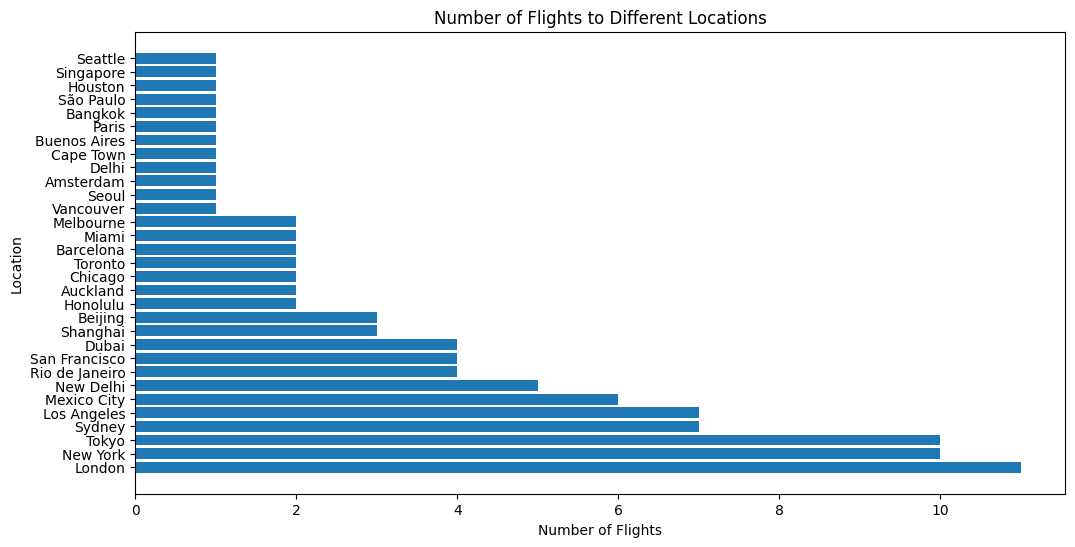

In [26]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Create a horizontal bar chart
ax.barh(list(to_locations_dict.keys()), list(to_locations_dict.values()))

# Add title and labels
ax.set_title('Number of Flights to Different Locations')
ax.set_xlabel('Number of Flights')
ax.set_ylabel('Location')

# Display the plot
plt.show()
